### Kelompok 7 UG-06

### Nama Peserta:
- Andrini Banjarnahor
- Hosea Anugrah Septian
- Shellya Nur Atqiya

## Pemodelan dan Peramalan Harga Saham pada BBRI menggunakan Python

---

### Assigment Tugas Akhir (Bagian 3): 

#### Melakukan eksplorasi dan persiapan data untuk membangun model. 

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

import seaborn as sns

sns.set()
import math
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings 
warnings.filterwarnings('ignore')

In [2]:
start = '2017-10-01'
end = '2021-10-01'

df = data.DataReader('BBRI.JK', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-10-02,3100.0,3050.0,3055.0,3050.0,69648500.0,2717.578857
2017-10-03,3085.0,3050.0,3070.0,3065.0,50441500.0,2730.943848
2017-10-04,3090.0,3055.0,3080.0,3055.0,49620500.0,2722.033691
2017-10-05,3080.0,3025.0,3080.0,3065.0,68734500.0,2730.943848
2017-10-06,3100.0,3030.0,3100.0,3075.0,91727000.0,2739.853760


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-09-27,3800.0,3730.0,3770.0,3750.0,380151200.0,3750.0
2021-09-28,3770.0,3690.0,3770.0,3720.0,306827400.0,3720.0
2021-09-29,3750.0,3690.0,3720.0,3740.0,143081800.0,3740.0
2021-09-30,3870.0,3750.0,3760.0,3850.0,416099000.0,3850.0
2021-10-01,3920.0,3830.0,3850.0,3900.0,359864700.0,3900.0


In [4]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-10-02,3100.0,3050.0,3055.0,3050.0,69648500.0,2717.578857
1,2017-10-03,3085.0,3050.0,3070.0,3065.0,50441500.0,2730.943848
2,2017-10-04,3090.0,3055.0,3080.0,3055.0,49620500.0,2722.033691
3,2017-10-05,3080.0,3025.0,3080.0,3065.0,68734500.0,2730.943848
4,2017-10-06,3100.0,3030.0,3100.0,3075.0,91727000.0,2739.853760


In [5]:
df = df.drop(['Date', 'Adj Close'], axis=1)
df.head()

,High,Low,Open,Close,Volume
0,3100.0,3050.0,3055.0,3050.0,69648500.0
1,3085.0,3050.0,3070.0,3065.0,50441500.0
2,3090.0,3055.0,3080.0,3055.0,49620500.0
3,3080.0,3025.0,3080.0,3065.0,68734500.0
4,3100.0,3030.0,3100.0,3075.0,91727000.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   High    1009 non-null   float64
 1   Low     1009 non-null   float64
 2   Open    1009 non-null   float64
 3   Close   1009 non-null   float64
 4   Volume  1009 non-null   float64
dtypes: float64(5)
memory usage: 39.5 KB


In [7]:
#Membersihkan data null
missing_values_count = df.isnull().sum()
missing_values_count[:]
df = df.dropna(axis=0)
df.isnull().sum()

High      0
Low       0
Open      0
Close     0
Volume    0
dtype: int64

In [9]:
df.describe()

,High,Low,Open,Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,3775.785947,3683.831729,3734.760183,3728.256895,1.366429e+08
std,554.006792,556.256828,559.491202,556.092669,9.614342e+07
min,2270.000000,2160.000000,2250.000000,2170.000000,0.000000e+00
25%,3270.000000,3160.000000,3200.000000,3210.000000,8.127200e+07
50%,3800.000000,3720.000000,3770.000000,3770.000000,1.141917e+08
75%,4250.000000,4150.000000,4200.000000,4200.000000,1.614960e+08
max,4950.000000,4800.000000,4920.000000,4890.000000,8.726073e+08


In [10]:
df.describe(include="all")

,High,Low,Open,Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,3775.785947,3683.831729,3734.760183,3728.256895,1.366429e+08
std,554.006792,556.256828,559.491202,556.092669,9.614342e+07
min,2270.000000,2160.000000,2250.000000,2170.000000,0.000000e+00
25%,3270.000000,3160.000000,3200.000000,3210.000000,8.127200e+07
50%,3800.000000,3720.000000,3770.000000,3770.000000,1.141917e+08
75%,4250.000000,4150.000000,4200.000000,4200.000000,1.614960e+08
max,4950.000000,4800.000000,4920.000000,4890.000000,8.726073e+08


In [11]:
df.mean()

High      3.775786e+03
Low       3.683832e+03
Open      3.734760e+03
Close     3.728257e+03
Volume    1.366429e+08
dtype: float64

In [12]:
df.sum()

High      3.809768e+06
Low       3.716986e+06
Open      3.768373e+06
Close     3.761811e+06
Volume    1.378727e+11
dtype: float64

In [13]:
df.median()

High           3800.0
Low            3720.0
Open           3770.0
Close          3770.0
Volume    114191700.0
dtype: float64

In [14]:
df.max()

High           4950.0
Low            4800.0
Open           4920.0
Close          4890.0
Volume    872607300.0
dtype: float64

In [15]:
df.min()

High      2270.0
Low       2160.0
Open      2250.0
Close     2170.0
Volume       0.0
dtype: float64

In [16]:
df.var()

High      3.069235e+05
Low       3.094217e+05
Open      3.130304e+05
Close     3.092391e+05
Volume    9.243557e+15
dtype: float64

In [17]:
df.std()

High      5.540068e+02
Low       5.562568e+02
Open      5.594912e+02
Close     5.560927e+02
Volume    9.614342e+07
dtype: float64

In [18]:
df.corr(method='pearson')

,High,Low,Open,Close,Volume
High,1.000000,0.993840,0.995701,0.995707,-0.213095
Low,0.993840,1.000000,0.996060,0.996325,-0.283534
Open,0.995701,0.996060,1.000000,0.992054,-0.255166
Close,0.995707,0.996325,0.992054,1.000000,-0.247317
Volume,-0.213095,-0.283534,-0.255166,-0.247317,1.000000


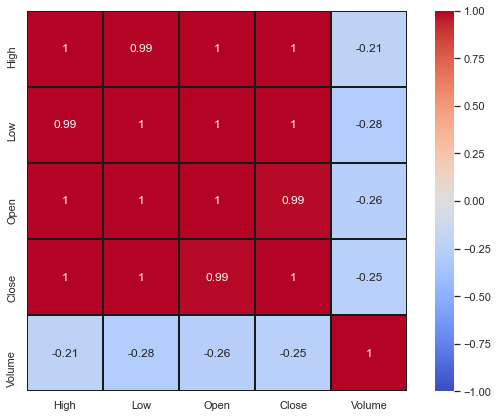

In [26]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.heatmap(df.corr(),annot=True,cmap='coolwarm',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

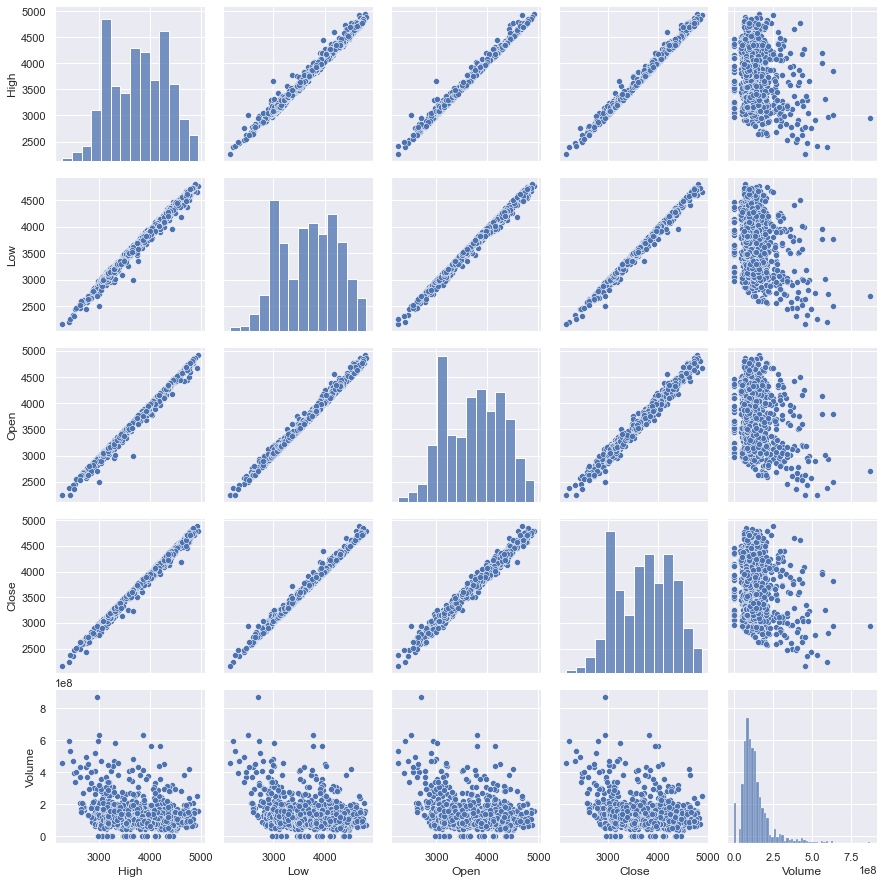

In [22]:
sns.pairplot(data=df,kind='scatter')
plt.show()

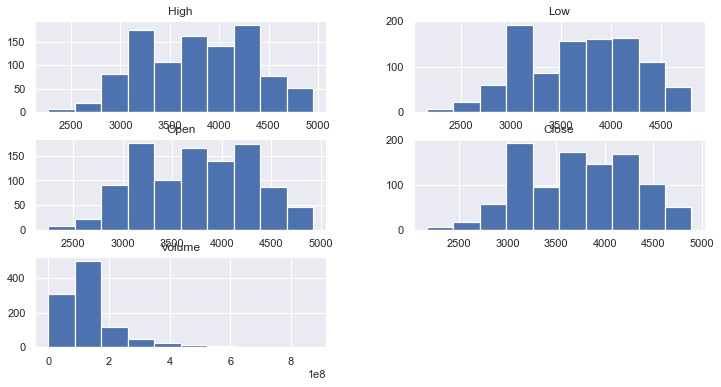

In [27]:
df.hist(linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)

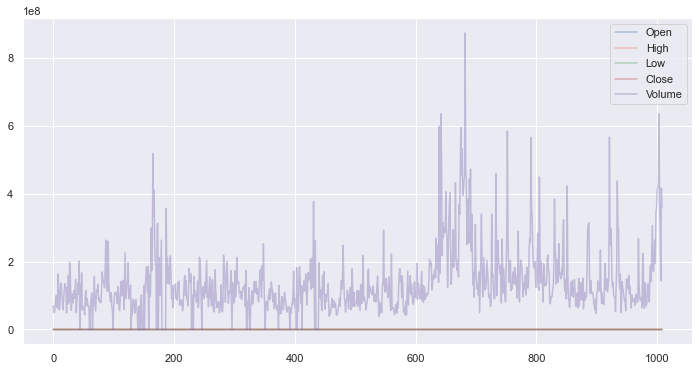

In [28]:
df.plot(y=['Open','High','Low','Close', 'Volume'],alpha=0.4,figsize=(12, 6));

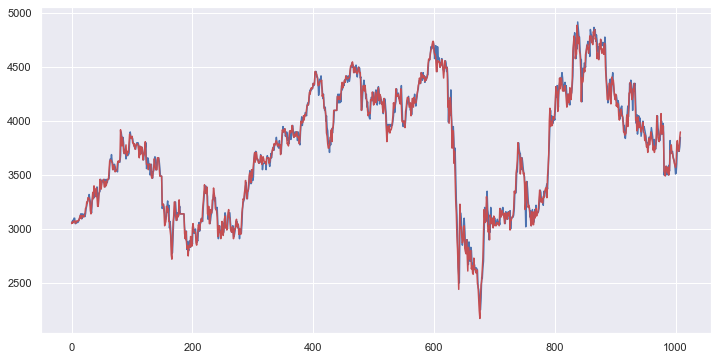

In [32]:
plt.figure(figsize = (12,6))
plt.plot(df.Open, 'b')
plt.plot(df.Close, 'r')
plt.show()

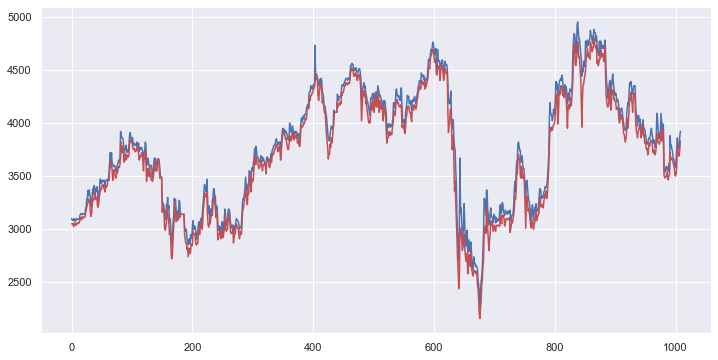

In [33]:
plt.figure(figsize = (12,6))
plt.plot(df.High, 'b')
plt.plot(df.Low, 'r')
plt.show()

---

### Assigment Tugas Akhir (Bagian 4): 

#### Membangun model sesuai dengan permasalahan.

---

In [34]:
x = df['Open'].values.reshape(-1,1)
y = df['Close'].values.reshape(-1,1)
print(x)
print()
print(y)

[[3055.]
 [3070.]
 [3080.]
 ...
 [3720.]
 [3760.]
 [3850.]]

[[3050.]
 [3065.]
 [3055.]
 ...
 [3740.]
 [3850.]
 [3900.]]


In [35]:
x_mean = np.mean(df['Open'])
y_mean = np.mean(df['Close'])
print('Nilai mean var x: ', x_mean,'\n'
      'Nilai mean var y: ', y_mean)

Nilai mean var x:  3734.760183495029 
Nilai mean var y:  3728.256894976462


In [36]:
atas = sum((x - x_mean)*(y - y_mean))
bawah = math.sqrt((sum((x - x_mean)**2)) * (sum((y - y_mean)**2)))
correlation = atas/bawah
print('Nilai Correlation Coefficient: ', correlation)

Nilai Correlation Coefficient:  [0.99205368]


In [37]:
#slope
variance = sum((x - x_mean)**2)
covariance = sum((x - x_mean) * (y - y_mean))
theta_1 = covariance/variance
print('Nilai theta_1: ',theta_1)

Nilai theta_1:  [0.98602762]


In [38]:
#intercept
theta_0 = y_mean - (theta_1 * x_mean)
print('Nilai theta_1: ',theta_0)

Nilai theta_1:  [45.6802022]


In [39]:
#prediction manual
y_pred = theta_0 + (theta_1 * 3470)

print(y_pred)

[3467.19604153]


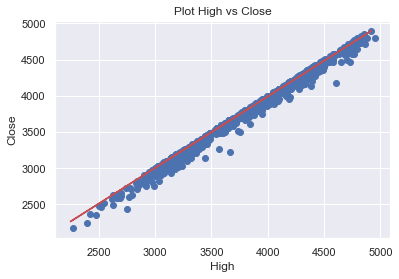

In [41]:
#visualisasi prediksi dengan scatter plot
y_pred = theta_0 + (theta_1 * x)

plt.scatter(df['High'], df['Close'])
plt.plot(x, y_pred, c='r')
plt.xlabel('High')
plt.ylabel('Close')
plt.title('Plot High vs Close')
plt.show()

In [42]:
X_train,X_test,y_train,y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [43]:
regressor = linear_model.LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [44]:
print(regressor.coef_)
print(regressor.intercept_)

[[0.98609866]]
[46.21231538]


In [45]:
regressor.score(X_test,y_test)

0.984652739961806

##### Artinya pemodelan yang telah dibuat mendapatkan accuracy score sebesar 98%.
---

In [46]:
print('Correlation: ', math.sqrt(regressor.score(X_test,y_test)))

Correlation:  0.9922966995620847


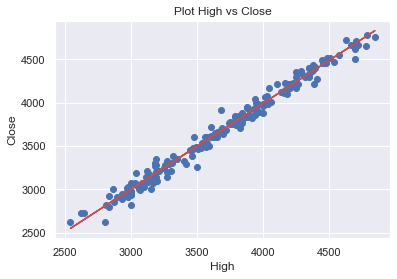

In [47]:
#visualisasi regression line dengan data testing.
y_pred = regressor.predict(X_test)

plt.scatter(X_test,y_test)
plt.plot(X_test, y_pred, c='r')
plt.xlabel('High')
plt.ylabel('Close')
plt.title('Plot High vs Close')
plt.show()

In [48]:
#prediksi dari close saham dengan open 3500, 3800, dan 4000.

print('nilai prediksi close saham dengan high saham 3500 : ',regressor.predict([[3500]]))
print('nilai prediksi close saham dengan high saham 3800 : ',regressor.predict([[3800]]))
print('nilai prediksi close saham dengan high saham 4000 : ',regressor.predict([[4000]]))

nilai prediksi close saham dengan high saham 3500 :  [[3497.55762732]]
nilai prediksi close saham dengan high saham 3800 :  [[3793.38722549]]
nilai prediksi close saham dengan high saham 4000 :  [[3990.6069576]]


In [49]:
np_table = np.concatenate((X_test,y_test,y_pred), axis=1)
new_dataframe = pd.DataFrame(data=np_table, columns=['X_test','y_test','y_predict'])
new_dataframe

,X_test,y_test,y_predict
0,3030.0,3070.0,3034.091257
1,4670.0,4670.0,4651.293060
2,4230.0,4230.0,4217.409650
3,4350.0,4400.0,4335.741489
4,4410.0,4270.0,4394.907408
...,...,...,...
197,3800.0,3770.0,3793.387225
198,3290.0,3290.0,3290.476909
199,4200.0,4170.0,4187.826690
200,2540.0,2630.0,2550.902913


In [50]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 48.83408061148045
Mean Squared Error: 4379.921558308568
Root Mean Squared Error: 66.18097580353864


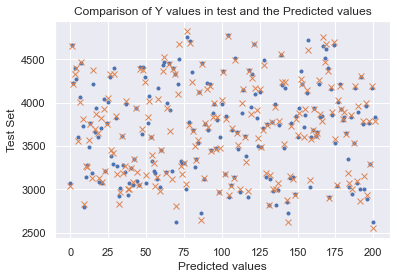

In [51]:
plt.title('Comparison of Y values in test and the Predicted values')
plt.ylabel('Test Set')
plt.xlabel('Predicted values')
plt.plot(y_test, '.', y_pred, 'x')
plt.show()

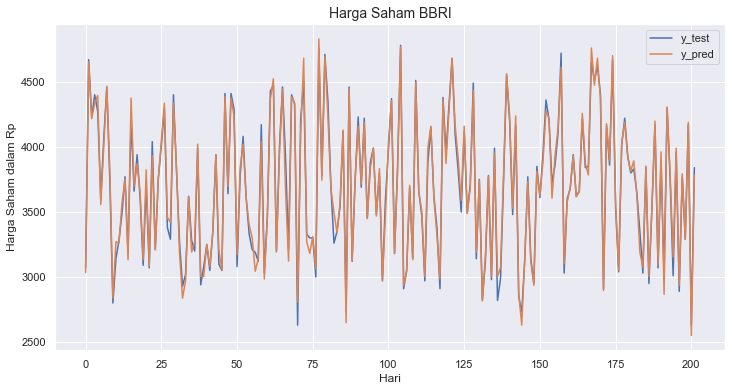

In [55]:
#Plot time dari data train dan test
plt.figure(figsize=(12,6))
plt.title('Harga Saham BBRI', fontsize = 14)
plt.plot(new_dataframe['y_test'])
plt.plot(new_dataframe['y_predict'])
plt.legend(['y_test','y_pred'])
plt.xlabel('Hari', fontsize=12)
plt.ylabel('Harga Saham dalam Rp', fontsize=12)
plt.show()

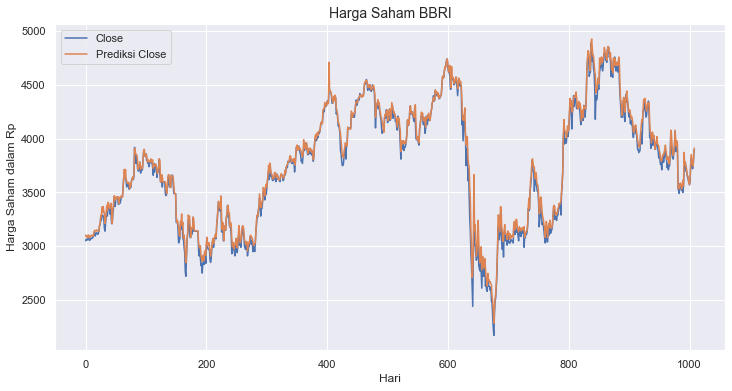

In [57]:
#mencari prediksi dengan masukan variabel High dari dataset
y_pred = regressor.predict(df[['High']])

#Plot time series dari harga saham -- diambil harga penutupan (Close)
plt.figure(figsize=(12,6))
plt.title('Harga Saham BBRI', fontsize = 14)
plt.plot(df['Close'])
plt.plot(y_pred)
plt.legend(['Close','Prediksi Close'])
plt.xlabel('Hari', fontsize=12)
plt.ylabel('Harga Saham dalam Rp', fontsize=12)
plt.show()

---
### Membangun model menggunakan metode LSTM.
---

In [60]:
ma100 = df.Close.rolling(100).mean()

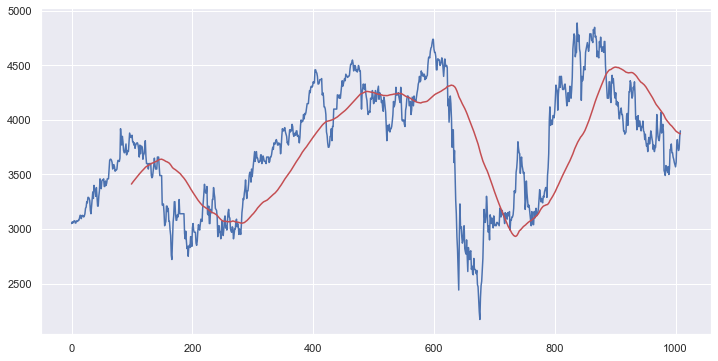

In [61]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.show()

In [63]:
ma200 = df.Close.rolling(200).mean()

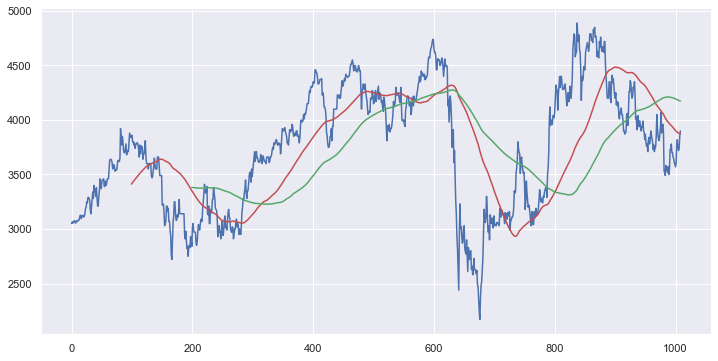

In [64]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.show()

In [65]:
df.shape

(1009, 5)

In [66]:
#Splitting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(706, 1)
(303, 1)


In [67]:
data_training.head()

,Close
0,3050.0
1,3065.0
2,3055.0
3,3065.0
4,3075.0


In [68]:
data_testing.head()

,Close
706,3050.0
707,3040.0
708,3030.0
709,3190.0
710,3140.0


In [69]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [70]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.34241245],
       [0.34824903],
       [0.34435798],
       [0.34824903],
       [0.35214008],
       [0.35214008],
       [0.34435798],
       [0.34435798],
       [0.35214008],
       [0.35019455],
       [0.35019455],
       [0.3540856 ],
       [0.3540856 ],
       [0.3618677 ],
       [0.37159533],
       [0.37159533],
       [0.35992218],
       [0.36964981],
       [0.37159533],
       [0.36964981],
       [0.36575875],
       [0.36964981],
       [0.37743191],
       [0.39688716],
       [0.40077821],
       [0.42023346],
       [0.41634241],
       [0.43579767],
       [0.43579767],
       [0.43190661],
       [0.42412451],
       [0.38910506],
       [0.37743191],
       [0.40466926],
       [0.43579767],
       [0.45525292],
       [0.43190661],
       [0.47859922],
       [0.46303502],
       [0.45914397],
       [0.43968872],
       [0.47081712],
       [0.43968872],
       [0.40466926],
       [0.40466926],
       [0.43968872],
       [0.45914397],
       [0.501

In [71]:
data_training_array.shape

(706, 1)

In [72]:
x_train =  []
y_train =  []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [73]:
#Machine Learning Model

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [74]:
x_train.shape

(606, 100, 1)

In [75]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model = Sequential()
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model = Sequential()
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model = Sequential()
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [76]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
19/19 [==============================] - 8s 133ms/step - loss: 0.1620
Epoch 2/50
19/19 [==============================] - 2s 126ms/step - loss: 0.0234
Epoch 3/50
19/19 [==============================] - 3s 133ms/step - loss: 0.0218
Epoch 4/50
19/19 [==============================] - 3s 133ms/step - loss: 0.0191
Epoch 5/50
19/19 [==============================] - 2s 126ms/step - loss: 0.0178
Epoch 6/50
19/19 [==============================] - 2s 123ms/step - loss: 0.0182
Epoch 7/50
19/19 [==============================] - 2s 125ms/step - loss: 0.0179
Epoch 8/50
19/19 [==============================] - 2s 126ms/step - loss: 0.0168
Epoch 9/50
19/19 [==============================] - 2s 121ms/step - loss: 0.0151
Epoch 10/50
19/19 [==============================] - 2s 123ms/step - loss: 0.0129
Epoch 11/50
19/19 [==============================] - 2s 125ms/step - loss: 0.0146
Epoch 12/50
19/19 [==============================] - 2s 126ms/step - loss: 0.0149
Epoch 13/50
19/19 [======

In [77]:
model.save('keras_model.h5')

In [78]:
data_testing.head()

,Close
706,3050.0
707,3040.0
708,3030.0
709,3190.0
710,3140.0


In [79]:
data_testing.tail(100)

,Close
909,4090.0
910,4110.0
911,4050.0
912,4050.0
913,3990.0
...,...
1004,3750.0
1005,3720.0
1006,3740.0
1007,3850.0


In [80]:
past_100_days = data_training.tail(100)

In [81]:
final_df = past_100_days.append(data_testing, ignore_index=True)

In [82]:
final_df.head()

,Close
0,4560.0
1,4560.0
2,4550.0
3,4550.0
4,4500.0


In [83]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.87867647],
       [0.87867647],
       [0.875     ],
       [0.875     ],
       [0.85661765],
       [0.86029412],
       [0.86764706],
       [0.88235294],
       [0.875     ],
       [0.84558824],
       [0.81985294],
       [0.84926471],
       [0.87867647],
       [0.86029412],
       [0.85294118],
       [0.85661765],
       [0.84926471],
       [0.72058824],
       [0.74264706],
       [0.66544118],
       [0.70955882],
       [0.75367647],
       [0.72794118],
       [0.67647059],
       [0.58088235],
       [0.63970588],
       [0.63970588],
       [0.52941176],
       [0.56985294],
       [0.48897059],
       [0.40073529],
       [0.35661765],
       [0.27941176],
       [0.23529412],
       [0.16544118],
       [0.09926471],
       [0.28308824],
       [0.38970588],
       [0.30882353],
       [0.3125    ],
       [0.27941176],
       [0.25735294],
       [0.26470588],
       [0.3125    ],
       [0.31617647],
       [0.23897059],
       [0.22794118],
       [0.220

In [84]:
input_data.shape

(403, 1)

In [85]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [86]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(303, 100, 1)
(303,)


In [87]:
#Making Predictions

y_predicted = model.predict(x_test)

In [88]:
y_predicted.shape

(303, 1)

In [89]:
y_test

array([0.32352941, 0.31985294, 0.31617647, 0.375     , 0.35661765,
       0.34558824, 0.36397059, 0.36764706, 0.35294118, 0.35661765,
       0.34191176, 0.32352941, 0.36029412, 0.34191176, 0.35661765,
       0.33823529, 0.36029412, 0.35661765, 0.34926471, 0.36397059,
       0.30147059, 0.33455882, 0.33455882, 0.34558824, 0.34558824,
       0.35294118, 0.375     , 0.43382353, 0.42647059, 0.43014706,
       0.49632353, 0.51102941, 0.54044118, 0.59926471, 0.57720588,
       0.5625    , 0.55882353, 0.49264706, 0.52941176, 0.54779412,
       0.51838235, 0.50735294, 0.49264706, 0.49632353, 0.45588235,
       0.37132353, 0.39705882, 0.46691176, 0.42647059, 0.40073529,
       0.37867647, 0.38602941, 0.375     , 0.35294118, 0.33455882,
       0.31617647, 0.36397059, 0.33823529, 0.31985294, 0.31985294,
       0.36397059, 0.34191176, 0.36397059, 0.375     , 0.34926471,
       0.36029412, 0.36029412, 0.375     , 0.40808824, 0.4375    ,
       0.41911765, 0.39705882, 0.40808824, 0.39705882, 0.39338

In [90]:
y_predicted

array([[0.33380696],
       [0.3344558 ],
       [0.334384  ],
       [0.3335781 ],
       [0.34367818],
       [0.3501845 ],
       [0.35399705],
       [0.36044717],
       [0.3667519 ],
       [0.36934614],
       [0.37166515],
       [0.3703966 ],
       [0.365053  ],
       [0.3663292 ],
       [0.3641668 ],
       [0.36478767],
       [0.36204684],
       [0.36353338],
       [0.36446944],
       [0.36405513],
       [0.36637998],
       [0.35695758],
       [0.3537948 ],
       [0.3511016 ],
       [0.3510027 ],
       [0.3513839 ],
       [0.35346544],
       [0.35983664],
       [0.377073  ],
       [0.3921749 ],
       [0.40648383],
       [0.4309974 ],
       [0.45563844],
       [0.4823787 ],
       [0.5155494 ],
       [0.54008484],
       [0.557655  ],
       [0.57061136],
       [0.5666623 ],
       [0.56711066],
       [0.5692358 ],
       [0.56416583],
       [0.55604136],
       [0.54468346],
       [0.534408  ],
       [0.51705414],
       [0.4845068 ],
       [0.459

In [91]:
scaler.scale_

array([0.00036765])

In [92]:
scale_factor = 1/0.00036765
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

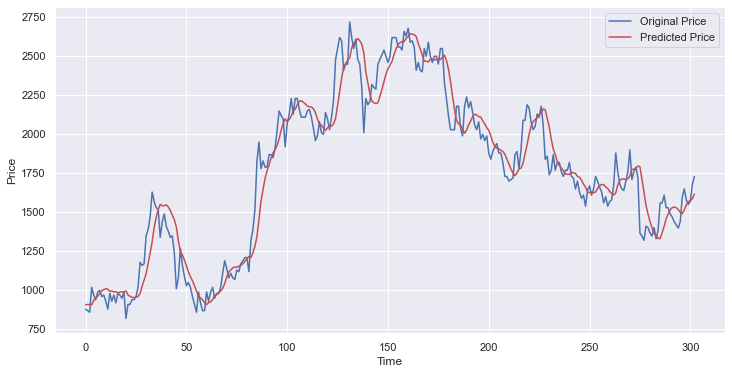

In [93]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

##### Perbandingan antara Original Price dan Predicted Price sudah didapatkan menggunakan model LSTM. Langkah selanjutnya adalah melakukan deployment program ke sebuah website.
---